# Analysing Population change by borough across Decades

In [1]:
%matplotlib inline

### Importing required Libraries

In [2]:
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
import string

In [5]:
import matplotlib

In [6]:
from matplotlib import pyplot

### Laod data

In [7]:
df = pd.read_csv("New_York_City_Population_By_Community_Districts.csv")

In [8]:
df.head()

,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
0,Bronx,1,"Melrose, Mott Haven, Port Morris","138,557","78,441","77,214","82,159","91,497"
1,Bronx,2,"Hunts Point, Longwood","99,493","34,399","39,443","46,824","52,246"
2,Bronx,3,"Morrisania, Crotona Park East","150,636","53,635","57,162","68,574","79,762"
3,Bronx,4,"Highbridge, Concourse Village","144,207","114,312","119,962","139,563","146,441"
4,Bronx,5,"University Hts., Fordham, Mt. Hope","121,807","107,995","118,435","128,313","128,200"


### Renaming Columns So that they follow Pep and can be Indexed

In [9]:
df.columns = ["C"+i.replace(" ","_") for i in df.columns]

In [10]:
df.head()

,CBorough,CCD_Number,CCD_Name,C1970_Population,C1980_Population,C1990_Population,C2000_Population,C2010_Population
0,Bronx,1,"Melrose, Mott Haven, Port Morris","138,557","78,441","77,214","82,159","91,497"
1,Bronx,2,"Hunts Point, Longwood","99,493","34,399","39,443","46,824","52,246"
2,Bronx,3,"Morrisania, Crotona Park East","150,636","53,635","57,162","68,574","79,762"
3,Bronx,4,"Highbridge, Concourse Village","144,207","114,312","119,962","139,563","146,441"
4,Bronx,5,"University Hts., Fordham, Mt. Hope","121,807","107,995","118,435","128,313","128,200"


### Using Groupby method in pandas to group by borough

In [11]:
df_borough= df.groupby(df['CBorough'])

In [12]:
df_borough.sum()

,CCD_Number
CBorough,
Bronx,78
Brooklyn,171
Manhattan,78
Queens,105
Staten Island,6


In [13]:
type(df.C1970_Population[1])



str

### Converting the values from String to int for further calculatioins

In [14]:
for i in range(3,len(df.columns)):
    df[df.columns[i]]=df[df.columns[i]].str.replace(",","")
    df[df.columns[i]]=df[df.columns[i]].apply(int)


In [15]:
type(df.C1980_Population[1])

numpy.int64

In [16]:
df[df.columns[5]].head(2)


0    77214
1    39443
Name: C1990_Population, dtype: int64

In [17]:
df.head()

,CBorough,CCD_Number,CCD_Name,C1970_Population,C1980_Population,C1990_Population,C2000_Population,C2010_Population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200


In [18]:
df_borough= df.drop('CCD_Number',axis=1).groupby('CBorough')

### Using Groupby object method sum to sm the values based on Borough

In [19]:
df_borough_sum= df_borough.sum()

### Tidy Data for plotting

In [20]:
df_borough_sum=df_borough_sum.add_suffix('_Count').reset_index()

In [21]:
df_borough_sum=df_borough_sum.set_index('CBorough').stack().reset_index().rename(columns={'level_1': 'Variable', 0: 'Value'})

### Calculating Percantage change in population to previous decade

In [22]:

df_borough_sum["percent_change"]= df_borough_sum['Value'].pct_change()

In [23]:
df_borough_sum.loc[df_borough_sum.Variable=='C1970_Population_Count','percent_change']=0 

In [24]:
df_borough_sum.percent_change = df_borough_sum.percent_change*100

In [25]:
lis =[]
for i in range(5):
    lis.append(df_borough_sum[df_borough_sum['Variable']== df_borough_sum['Variable'].unique()[i]].percent_change) 
    

In [26]:
nlis = [int(round(i)) for j in lis for i in j]

### Plotting Using Seaborn 

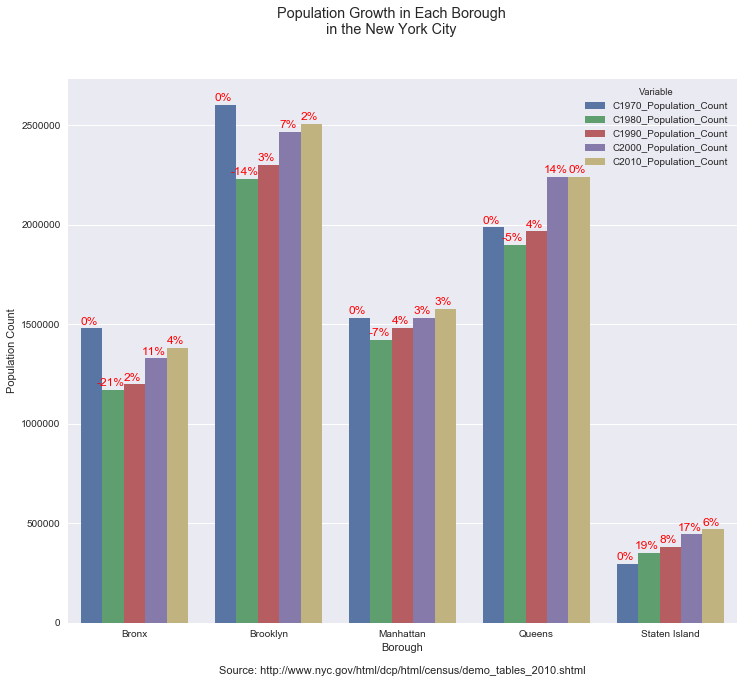

In [27]:
sns.set(style="darkgrid")
fig, ax1 = pyplot.subplots(figsize=(12,10))
sns.barplot(x='CBorough', y='Value', hue='Variable', data=df_borough_sum, ax=ax1)
fig.suptitle("Population Growth in Each Borough\n in the New York City ")
x=0

for p in ax1.patches:
    
    ax1.text(p.get_x()+p.get_width()/2.5,p.get_height()+10000,"{:}%".format(nlis[x]),fontsize=12, color='red', ha='center', va='bottom')
    x +=1 
ax1.set(xlabel= "Borough\n\nSource: http://www.nyc.gov/html/dcp/html/census/demo_tables_2010.shtml", ylabel = "Population Count")
sns.despine(fig)

### We can observe that there is fall in population in 1980 and from gradual increase in population after that